# Reinforcement Learning Intuition

Reinforcement learning is a subfield of machine learning where an agent learns to make decisions by performing actions in an environment to maximize some notion of cumulative reward. Unlike supervised learning, where the model is trained on a fixed dataset of input-output pairs, RL involves learning through interaction with the environment, with the aim of discovering the optimal actions that yield the highest reward over time. RL is considered to be the closest algorithm of Artificial Intelligence in a sense that we are making programs that play some actions like a robot.

For example, to make the robot dog walk, we can implement an algorithm that will tell the dog how to walk. we can tell, move your front right foot, move your back left foot etc.. We can give sequence of actions that it needs to take in order to accomplish a task which is walking. Or we can implement a reinforcement algorithm which will train the dog to walk in a very very interesting way. It will say, here are all the actions that you can take: you can move your legs like this or that. your goal is to make a step forward. Every time the robot takes a step forward, we will give it a reward. And everytime it fails, the robot will be punished. And the rewards may be one in binary and the punishment is zero. So we don't need to program an algorithm for it to walk. It will learn itself for walk. That's reinforcement learning.

**Key Components of Reinforcement Learning**

**Agent:** The learner or decision-maker that interacts with the environment.

**Environment:** Everything the agent interacts with and operates within.

**State (s):** A representation of the current situation or configuration of the environment.

**Action (a):** A decision or move made by the agent that affects the state.

**Reward (r):** Feedback from the environment, typically a scalar value, which the agent aims to maximize.

**Policy (π):** A strategy used by the agent to decide which actions to take based on the current state. Policies can be deterministic or stochastic.

**Value Function (V):** Estimates the expected cumulative reward from a given state, helping the agent assess the long-term benefit of states.

**Q-Value or Action-Value Function (Q):** Estimates the expected cumulative reward from taking a particular action in a given state.

**How Reinforcement Learning Works**
**Initialization:** The agent starts with some initial policy or strategy.

**Interaction:** The agent interacts with the environment by observing the state, taking an action, and receiving a reward.

**Learning:** The agent updates its knowledge (policy, value functions) based on the received reward and observed transitions.

**Iteration:** Steps 2 and 3 are repeated, allowing the agent to learn and improve its policy over time.

**Applications of Reinforcement Learning**

**1.Robotics:**
Autonomous navigation and manipulation tasks.
Example: A robot learning to pick and place objects.

**Gaming:**
Training AI to play and excel in games.
Example: AlphaGo, which mastered the game of Go, and AlphaZero, which excelled in Go, Chess, and Shogi.

**Finance:**
Portfolio management, algorithmic trading, and risk management.
Example: RL-based strategies for trading stocks and options.

**Healthcare:**
Personalized treatment plans, medical diagnosis, and drug discovery.
Example: Optimizing chemotherapy dosage for cancer treatment.

**Examples of Reinforcement Learning in Action**

**AlphaGo by DeepMind:**
Utilized deep RL and Monte Carlo tree search to defeat human champions in the game of Go.

**OpenAI Five:**
Trained a team of AI agents to play the complex strategy game Dota 2, achieving superhuman performance.

**Autonomous Helicopter Flight:**
RL algorithms were used to teach helicopters to perform acrobatic maneuvers autonomously.

Although we have various types of reinforcement algorithms like **model free algorithms, policy based algorithms, model based algorithms and advanced algorithms**

**1. Model free algorithms** - Q-Learning, SARSA(State-Action-Reward-State-Action), Deep Q-Networks, Double DQN, Dueling DQN.

**2. Policy based algorithms** - REINFORCE, Actor-Critic, Advantage Actor-Critic(A2C), Asynchronous Advantage Actor-Critic(A3C).

**3. Model based algorithms** - Monte Carlo Tree Search(MCTS), AlphaZero

**4. Advanced Algorithms** - Proximal Policy Optimization(PPO), Soft Actor-Critic(SAC), Trust Region Policy Optimization, Rainbow, TD3 (Twin Delayed Deep Deterministic Policy Gradient).

**The multi armed bandit problem**



Of all the above RL types, today we are going to deal with 2 significant reinforcement learning algorithms particularly in the domain of **multi-armed bandit problems**. They are,

1. Upper confidence Bound

2. Thomson Sampling

Both Upper Confidence Bound and Thompson Sampling algorithms are essential tools in the arsenal of reinforcement learning, particularly for problems where the **primary challenge is balancing exploration and exploitation.** They are simple, effective, and provide a good foundation for understanding more complex RL algorithms.

In earlier days, we have a slot machine with lever/arm to push start the game. It's basically a gambling game where put coin and play either to win or loose. In most cases we will loose the money, hence the word **bandit**. It's a kind of robbery that takes our money most of the times. This is typically a single arm. Multi-armed means a lot of machines(more than one) is arranged to play the game. How to crack the logic here. How to win most of the cases but trying less time.
That is where the **exploration-exploitation trade off** comes into picture. We have to take less attempt(exploration) and win on a machine(exploitation).

Let's say we have some **distributions** behind these machines which is not known. A well distributed machine will make us to win in such a way that the skewness is more, mean, median is huge etc. Our job is to identify the best machine with less exploration and make the win out of the attempts. here in the below diagram, D5 is the best distribution so as the best machine to win the bet. How to identify this with less exploration.

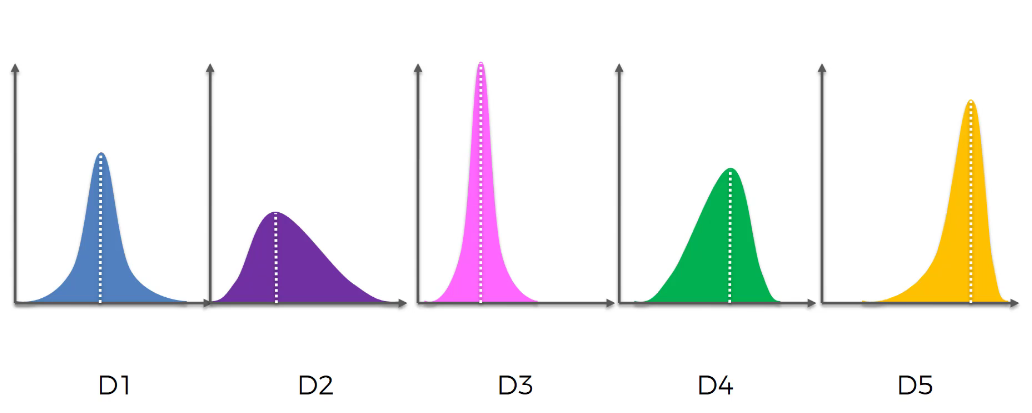

# Upper Confidence Bound Intuition

Let's see an example of **car company** that provide **ads to users** for them to pick up the best one. We have **10 ads displayed on a web page** for users to click or not which was like by them. Our intention is to identify the best clicked or liked ads by users without much exploration. We need to find the best ads among other designs - the best ad that will convert the maximum customers to click ad. Here we need to optimize the **click through rate (CTR)**

Car company has 10 different design of ads and ad team wonders which ad will convert the most. which ad will attract most of the people to click the add and potentially buy SUV. The process of **online learning** is such a way that these 10 ads are shown in the webpage to different users when they connect to a certain website or displayed at the top when users type research on google. We will show one of these ads each time when a user connects to a webpage and record whether or not they clicked yes or no on the ad.

To do this, ofcourse we can run **A/B test** and then use the results of that. But that means, we are doing the exploration and then exploitation separately which will incur cost, waste of time. This can be achieved by Upper confidence bound concept. We need to combine the exploration of all these machines with their exploitation in order to find out which one of these machines is the best so that we can start exploiting that one.

**Method of implementation** - when a new user clicks the webpage, our UCB algorithm will display an ad, and then the user decides to click yes or no on the ad. If the user clicks the ad, we will record it as 1, if the user doesn't, it will be recorded as 0. This is followed for all other users who connects to a webpage. We do this for 10,000 users.

The dataset that we use below is not real-time process as we cannot make 10 ads to the users for them to click the best one
or to sell the car for the best ad. So it's just the simulation.

We have 10,000 rows. which means 10,000 users. Each row corresponding to each users.
We have 10 columns. which means 10 ad designs. Each column corresponding to each ad.
The cells that has 1 means the user had clicked that particular ad
The cells that has 0 means the user did not clicked that particular ad.

We can do this by just a **naive algorithm** using statistic technique. But each time we impress an ad on the website or google, it will incur cost. Therefore we need to figure out as fast as possible in minimum no. of rounds (users are represented as rounds) which ad converts the most. That's why we need a **stronger algorithm like UCB or thompson sampling** instead of a simple statistic technique.

We will run the UCB and thompson sampling to figure out the **highest conversion rate**. The ad on which the users click the most.

But each ad(columns) has some **fixed conversion rate (convert over time the same rate of people)**. One Ad1 will have a certain conversion rate, Ad2 has another conversion rate and same for all other ads. Because this is the required assumption of both UCB and thompson sampling algorithm 

There are few steps that we follow to implement the upper confidence bound algorithm. We will implement each step via. the python coding.

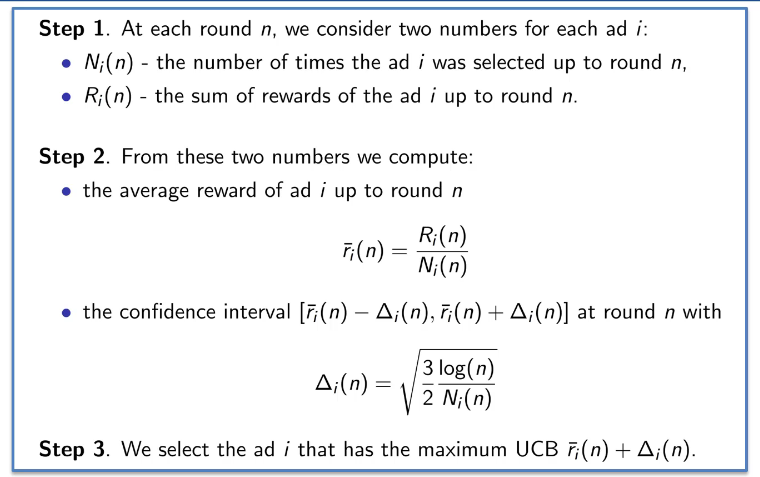

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [ ]:
df = pd.read_csv('/kaggle/input/ads-ctr-optimization/Ads_CTR_Optimisation.csv')

# Implementing UCB

In [ ]:
"""Firstly, our step is to create two variables for step1 in the diagram. 
1. numbers_of_selections - the 'no.of times the ad is selected upto round n'. Iniliaze it with a list of 10 zeros
2. sums_of_rewards - the 'sum of rewards of the ad upto round n'. Iniliaze it with a list of 10 zeros

Continue further by creating few other variables
3. N - Total no.of users to show one of the ads (10,000) are shown. So, Initialize it with N = 10,000
4. d - No.of ads we have(10). So, Initialize it with d = 10
5. ads_selected - The list of selected ads over the rounds. Initially it will be empty. Later on it will become
   10,000 elements corresponding to the 10,000 ads that were selected by appending
6. total_rewards - Sum of all rewards received at each round. Initialize it with 0 as initialy there will not be reward

Next, we will implement a for loop to iterate through all 10,000 rounds or users to calculate the no.of ads that is
been selected. Simply, step 2 in the diagram. Remember, the range is set to 0 to N since, N is assigned already with
the value 10,000. Later, if we need to change the user count to 500 means, simply we change the N value.

Next, we are assigning a variable called 'ad' to a zero since that will be iterated through the for loop. It means we
need to select an ad for each iteration of round. The value is equated to zero because of python index and here zero
first ad. In the second for loop we will iterate through all these ads to find the maximum upper confidence bound.

Next, we create a variable called 'max_upper_bound' in order to compare it with all other upper confidence
bounds in the second for loop. Then, once we get the ad that has higher upper confidence bound, this max_upper_bound will
be assigned to that higher value.Our ultimate goal is to select the ad that has the max upper confidence bound.

Next, we will begin the second for loop to iterate through all the ads. Remember, the range is set to 0 to d since,
d is assigned already with the value 10. Later, if we need to change the ad count to 5 means, simply we change the d value.

Then we need check whether the 'numbers_of_selections' is not zero because if the fraction is zero in denominator,
then the value would be infinity in step 2 of average_reward calculation. So it must be greater than zero in
if condition.

Next step is to import the math module. We need this to use sqrt() and log().

Next, we will introduce a new variable called 'del_i' to calculate the delta(i) or the confidence interval(i).

Next, when we implement log function, remember we cannot just put 'n'. since the value of n is 0 in the first iteration,
log(0) will be infinity. So we will put log(n + 1). This means, we are calculating from first to tenth ad. For zeroth ad
we will implement in the next step along with finding maximum upper confidence bound.

Next, we will assign a variable called 'upper_bound' to add the value of average_reward and del_i.

Next is the else part where we will work on zeroth index of ad and maxiumum upper confidence bound calculation."""

import math
N = 10000
d = 10
numbers_of_selections = [0] * d
sum_of_rewards = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            del_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + del_i
        else:
            